<a href="https://colab.research.google.com/github/saideep872/COVID-19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd #import pandas library
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
from matplotlib import  rc
import numpy as np
import datetime as dt
import requests
import seaborn as sns
%matplotlib inline



##reading the csv file

timeseries data


In [13]:
r = requests.get('https://api.covid19india.org/data.json')
x = r.json()
df = pd.DataFrame(x['cases_time_series'])
sdf = pd.DataFrame(x['statewise'])    
tdf = pd.DataFrame(x['tested'])                             
df['Date']=pd.date_range('2020-01-30', periods=df['totalconfirmed'].count())
df=df.drop(["date"],axis=1)
k=[]
l=0
for i in range(df['totalconfirmed'].count()):
  k.append(l+1)
  l=l+1
df['sno']=k



In [14]:
s = requests.get('https://api.covid19india.org/states_daily.json')
i= s.json()
state= pd.DataFrame(i['states_daily'])

conf=state.loc[state['status']=='Confirmed']
conf['Date']=pd.date_range('2020-03-14', periods=conf['status'].count())
rec=state.loc[state['status']=='Recovered']
rec['Date']=pd.date_range('2020-03-14', periods=rec['status'].count())
dec=state.loc[state['status']=='Deceased']
dec['Date']=pd.date_range('2020-03-14', periods=dec['status'].count())
dec=dec.drop(['date'],axis=1)
conf['date']=conf['Date'].dt.strftime('%m/%d')
conf.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [15]:
df.to_csv('india.csv')

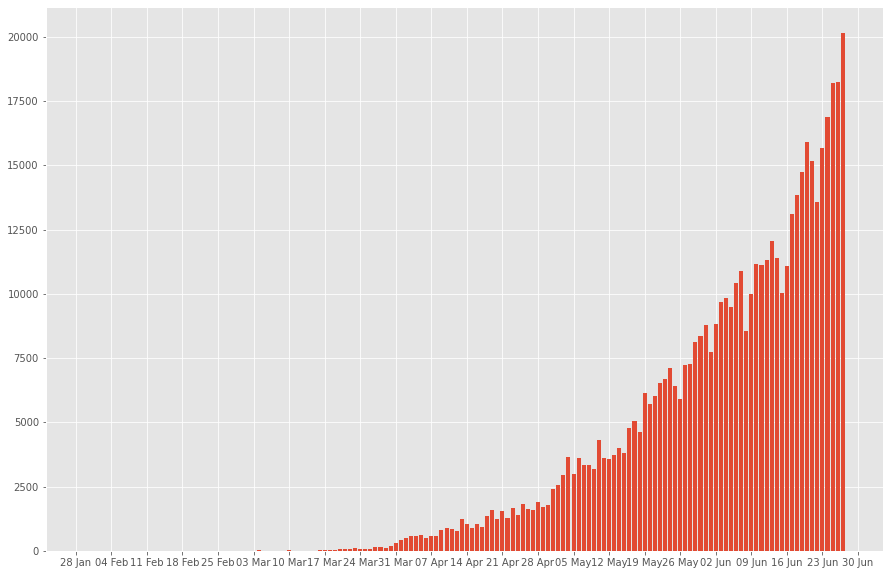

In [16]:
data = pd.read_csv('india.csv', usecols=['Date','dailyconfirmed'], parse_dates=['Date'])
#set date as index
#df=df.parse_dates['Date']
data.set_index('Date',inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(15,10))
#data.plot(ax=ax)
ax.bar(data.index, data['dailyconfirmed'])
#set ticks every week
plt.style.use('ggplot')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
#ax.set_xticklabels(labels=data['date'], rotation=45, ha='right')
plt.show()